# YOLOv8
* It is 8th model in the You Only Look Once(YOLO) algorithm series. YOLO is mostly known for object detection and classification and segmentation tasks.
* It is a single shot algorithm (directly classifies an object in a single pass by having one NN predict bounding boxes and class probabilities using a full image as an input).
* Based on the number of parameters it comes in 5 variants:
    * nano (n)
    * small (s)
    * medium (m)
    * large (l)
    * extra large (x)

# (a) Classification using YOLOv8

# Zeroshot Image Classification

## Settings

In [3]:
!pip install ultralytics
!pip install -U ipywidgets
#import ultralytics
image_path='/kaggle/input/sampledsailporini/sample-dsail-porini/dataset/2021-07-09-09-09-05.jpg'

## Modelling

In [4]:
# # Load the ImageNet class labels
import json
with open("/kaggle/input/sampledsailporini/labels_map.txt","r") as f:
    classes_dict = json.load(f)
# Print the predicted class label
#print("Classes :", classes_dict['352'])

In [5]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Check for CUDA device and set it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

image_path='/kaggle/input/sampledsailporini/sample-dsail-porini/dataset/2021-07-09-09-09-05.jpg'
## Load a model
#model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt').to(device)  # build from YAML and transfer weights

# Train the model
#results = model.train(data='mnist160', epochs=100, imgsz=64)

# Predict with the model
results = model(image_path)  # predict on an image

Using device: cuda
YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 19.2MB/s]


Transferred 158/158 items from pretrained weights

image 1/1 /kaggle/input/sampledsailporini/sample-dsail-porini/dataset/2021-07-09-09-09-05.jpg: 640x640 352 0.14, 353 0.10, 273 0.03, 173 0.03, 351 0.03, 3.4ms
Speed: 53.8ms preprocess, 3.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("Top 1 Class : ",results[0].probs.top1)
print("Top 1 Confidence : ",results[0].probs.top1conf)

Top 1 Class :  352
Top 1 Confidence :  tensor(0.1351, device='cuda:0')


impala, Aepyceros melampus   13.51345181465149%


100%|██████████| 755k/755k [00:00<00:00, 4.04MB/s]


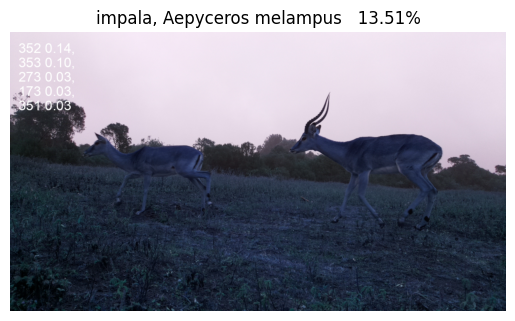

In [7]:
title=f"{str(classes_dict[str(results[0].probs.top1)])+'   '+str(results[0].probs.top1conf.item()*100)+'%'}"
print(title)
plt.imshow(results[0].plot())
plt.axis('off')
# Add title
title=f"{str(classes_dict[str(results[0].probs.top1)])+'   '+str(round(float(results[0].probs.top1conf.item()*100),2))+'%'}"
plt.title(title)
# Show the plot
plt.show()

# Download training dataset from ![](https://blog.roboflow.com/assets/images/logo-4x.png?v=0d2f75cb36)

In [8]:
# # !wget https://app.roboflow.com/ds/U8eETZqOAo?key=9AAIElFVFm
# !curl -L "https://app.roboflow.com/ds/U8eETZqOAo?key=9AAIElFVFm" &gt; roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#https://app.roboflow.com/ds/U8eETZqOAo?key=9AAIElFVFm

In [9]:
import urllib.request

url = "https://app.roboflow.com/ds/U8eETZqOAo?key=9AAIElFVFm"
urllib.request.urlretrieve(url, "file.zip")
print("File downloaded successfully!")

File downloaded successfully!


In [10]:
!mkdir data
!unzip file.zip -d data/


Archive:  file.zip
 extracting: data/README.dataset.txt  
 extracting: data/README.roboflow.txt  
   creating: data/test/
   creating: data/test/impala/
 extracting: data/test/impala/2021-09-18-10-49-42_jpg.rf.c7760e45ed64962c5663359405d3341d.jpg  
 extracting: data/test/impala/2021-10-14-06-03-21_jpg.rf.fd4e63904b6a29bd74888c6924cc67b9.jpg  
 extracting: data/test/impala/2021-10-14-06-03-24_jpg.rf.57b9f1338d03ce89ba4d2327b0227daf.jpg  
 extracting: data/test/impala/2021-10-14-16-20-27_jpg.rf.9f7fbbcf1b095b1a128f24a1f534035b.jpg  
 extracting: data/test/impala/2021-10-17-15-24-13_jpg.rf.c29225270f351ae1ed80271660c0c960.jpg  
 extracting: data/test/impala/2021-10-22-06-16-09_jpg.rf.3a4111e94fe2898406054f43671ea382.jpg  
 extracting: data/test/impala/2021-10-22-15-02-01_jpg.rf.d8717c6660c3211ec6cf8feb18ce2c60.jpg  
 extracting: data/test/impala/2021-11-30-16-01-03_jpg.rf.a24e3759c1479908bab26582ae8aa2fe.jpg  
 extracting: data/test/impala/2021-11-30-16-03-03_jpg.rf.f8a3a41912042a67782d1d

# Training on DSAIL-Porini for Image Classification

In [11]:
#import wandb
#wandb.disabled = True
import os
os.environ['WANDB_MODE'] = 'disabled'

In [12]:
import torch
from ultralytics import YOLO

# Check for CUDA device and set it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Load model
model = YOLO('yolov8n-cls.pt').to(device)

# Train the model
results = model.train(data='/kaggle/working/data/', epochs=60, imgsz=256)

Using device: cuda
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/working/data/, epochs=60, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, opt

2024-05-07 16:31:27.379830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 16:31:27.379926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 16:31:27.521137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=1000 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 6.23M/6.23M [00:00<00:00, 20.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train... 1220 images, 0 corrupt: 100%|██████████| 1220/1220 [00:00<00:00, 2777.86it/s]

train: New cache created: /kaggle/working/data/train.cache



val: Scanning /kaggle/working/data/test... 59 images, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 2198.00it/s]

val: New cache created: /kaggle/working/data/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 60 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]

                   all      0.898          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 74.01it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.94it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 94.14it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 74.60it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.24it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 87.52it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 95.70it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      10/60     0.371G    0.04878          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 89.55it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      11/60     0.386G    0.02615          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.04it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      12/60     0.373G    0.04581          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.60it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      13/60     0.373G    0.03072          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 95.60it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      14/60     0.371G    0.07845          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.25it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      15/60     0.386G    0.03087          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 84.31it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      16/60     0.373G    0.04024          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.09it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      17/60     0.373G    0.02832          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.03it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      18/60     0.371G     0.0337          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 90.97it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      19/60     0.386G    0.03408          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 90.81it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      20/60     0.373G    0.02178          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 70.47it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      21/60     0.373G    0.02595          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 86.37it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      22/60     0.371G    0.02339          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 67.49it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      23/60     0.386G    0.02069          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 90.53it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      24/60     0.373G    0.01853          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.43it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      25/60     0.373G     0.0169          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 95.36it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      26/60     0.371G    0.01716          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 91.46it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      27/60     0.386G    0.03455          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 91.03it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      28/60     0.373G    0.01969          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 88.80it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      29/60     0.373G    0.03318          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 88.74it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      30/60     0.371G    0.02607          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 89.89it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      31/60     0.386G    0.01821          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.11it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      32/60     0.373G    0.02197          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 89.59it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      33/60     0.373G    0.02233          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.79it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      34/60     0.371G    0.02305          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 87.70it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      35/60     0.386G    0.02214          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.96it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      36/60     0.373G    0.01802          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 76.13it/s]


                   all      0.949          1

      Epoch    GPU_mem       loss  Instances       Size


      37/60     0.373G    0.02624          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.62it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


      38/60     0.371G    0.01443          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 70.30it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      39/60     0.386G    0.01581          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 93.79it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      40/60     0.371G    0.01089          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.83it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      41/60     0.373G    0.01201          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 86.93it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      42/60     0.371G    0.01364          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 82.92it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      43/60     0.386G    0.01192          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 90.09it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      44/60     0.373G   0.008155          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      45/60     0.373G    0.02714          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 80.51it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      46/60     0.371G   0.005893          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 91.58it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      47/60     0.386G     0.0169          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.16it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


      48/60     0.373G    0.01464          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 89.92it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      49/60     0.373G    0.00803          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 68.69it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      50/60     0.371G    0.01239          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.27it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


      51/60     0.386G    0.01017          4        256: 100%|██████████| 77/77 [00:08<00:00,  9.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 85.27it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      52/60     0.373G    0.01247          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.46it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      53/60     0.373G    0.01228          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 67.63it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      54/60     0.371G    0.01976          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 87.01it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      55/60     0.386G   0.009176          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 96.07it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      56/60     0.373G    0.01006          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 90.76it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      57/60     0.373G   0.008103          4        256: 100%|██████████| 77/77 [00:06<00:00, 11.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 89.95it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      58/60     0.371G    0.01496          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 94.24it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      59/60     0.386G    0.01386          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 92.00it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      60/60     0.373G   0.009831          4        256: 100%|██████████| 77/77 [00:07<00:00, 10.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.17it/s]

                   all      0.966          1



60 epochs completed in 0.133 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/data/train... found 1220 images in 3 classes ✅ 
val: None...
test: /kaggle/working/data/test... found 59 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.74it/s]


                   all      0.966          1
Speed: 0.2ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [13]:
#df.columns

#Report_Card.loc[:,"Grades"]

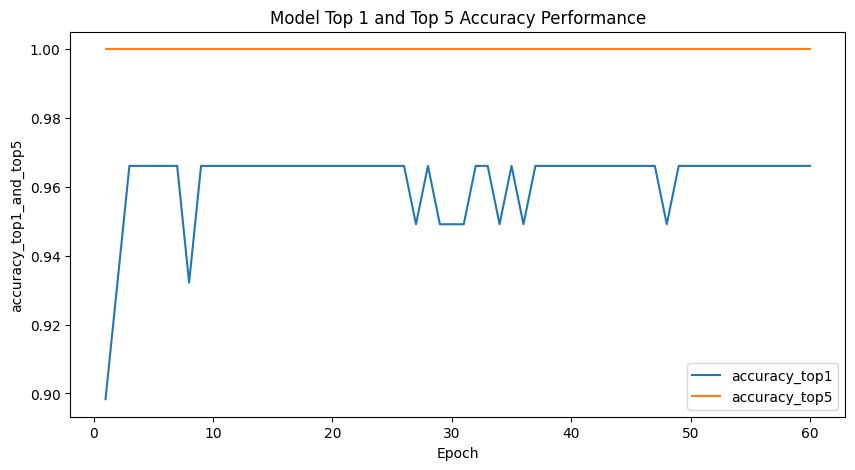

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your results file
df = pd.read_csv('/kaggle/working/runs/classify/train/results.csv')

# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['  metrics/accuracy_top1'], label='accuracy_top1')
plt.plot(df['                  epoch'], df['  metrics/accuracy_top5'], label='accuracy_top5')
plt.xlabel('Epoch')
plt.ylabel('accuracy_top1_and_top5')
plt.title('Model Top 1 and Top 5 Accuracy Performance')
plt.legend()
plt.show()

# You can also plot other metrics similarly by changing the column name, e.g., df['precision'], df['recall']

Top5 accuracy is 1 because there are only 4 classes

In [15]:
df.columns

Index(['                  epoch', '             train/loss',
       '  metrics/accuracy_top1', '  metrics/accuracy_top5',
       '               val/loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

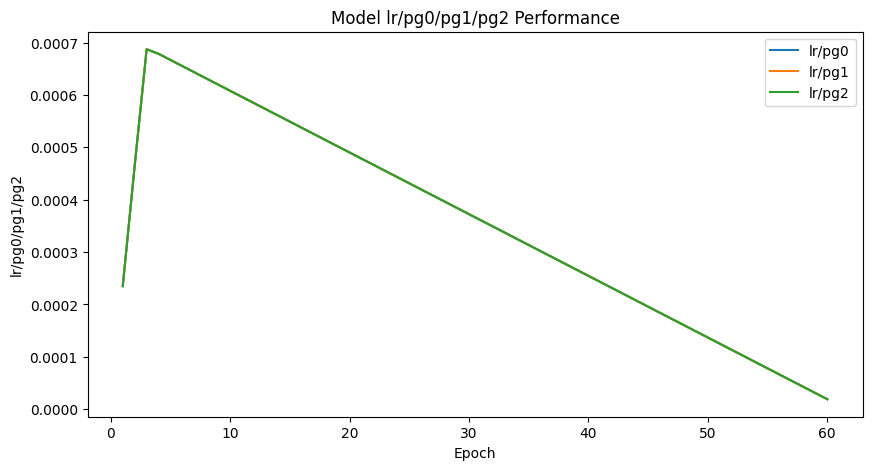

In [16]:
# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['                 lr/pg0'], label='lr/pg0')
plt.plot(df['                  epoch'], df['                 lr/pg1'], label='lr/pg1')
plt.plot(df['                  epoch'], df['                 lr/pg2'], label='lr/pg2')
plt.xlabel('Epoch')
plt.ylabel('lr/pg0/pg1/pg2')
plt.title('Model lr/pg0/pg1/pg2 Performance')
plt.legend()
plt.show()

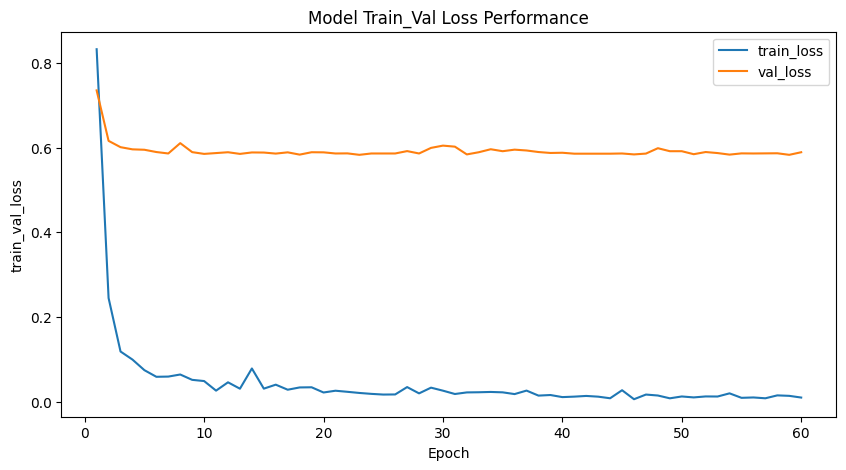

In [17]:
# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['             train/loss'], label='train_loss')
plt.plot(df['                  epoch'], df['               val/loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('train_val_loss')
plt.title('Model Train_Val Loss Performance')
plt.legend()
plt.show()

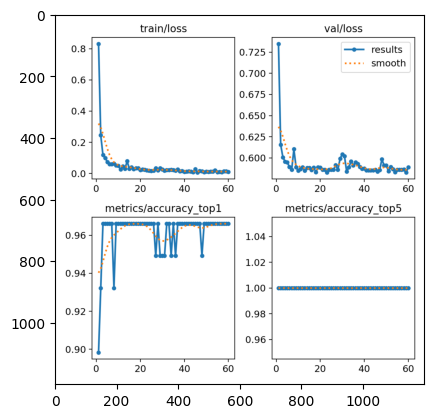

In [18]:
plt.imshow(plt.imread("/kaggle/working/runs/classify/train/results.png"))

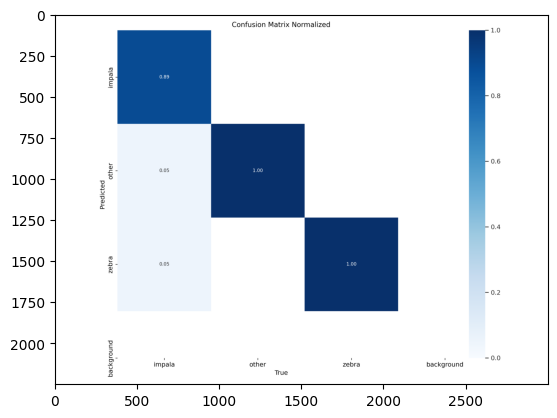

In [19]:
plt.imshow(plt.imread("/kaggle/working/runs/classify/train/confusion_matrix_normalized.png"))

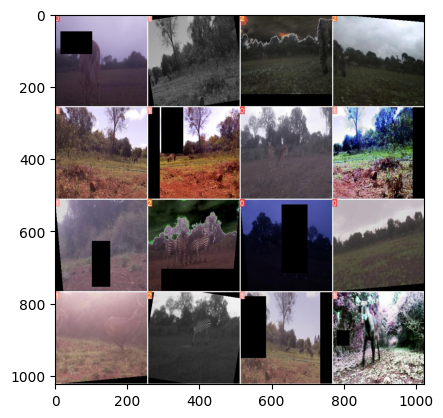

In [20]:
plt.imshow(plt.imread("/kaggle/working/runs/classify/train/train_batch1.jpg"))

In [21]:
results = model(image_path)  # predict on an image


image 1/1 /kaggle/input/sampledsailporini/sample-dsail-porini/dataset/2021-07-09-09-09-05.jpg: 256x256 impala 1.00, other 0.00, zebra 0.00, 2.9ms
Speed: 11.1ms preprocess, 2.9ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)


In [22]:
names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("Top 1 Class : ",results[0].probs.top1)
print("Top 1 Confidence : ",results[0].probs.top1conf)

Top 1 Class :  0
Top 1 Confidence :  tensor(1.0000, device='cuda:0')


In [23]:
results[0].names[results[0].probs.top1]

'impala'

impala   99.9998688697815%


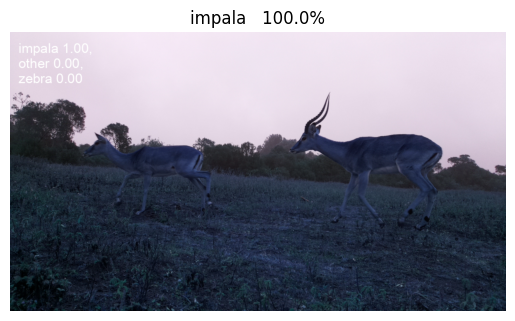

In [27]:
title=f"{str(results[0].names[results[0].probs.top1])+'   '+str(results[0].probs.top1conf.item()*100)+'%'}"
print(title)
plt.imshow(results[0].plot())
plt.axis('off')
# Add title
title=f"{str(results[0].names[results[0].probs.top1])+'   '+str(round(float(results[0].probs.top1conf.item()*100),2))+'%'}"
plt.title(title)
# Show the plot
plt.show()

In [25]:
# from ultralytics import YOLO

# # Load a model
# #model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
# #model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# # Train the model
# results = model.train(data='mnist160', epochs=100, imgsz=64)

In [26]:
#!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/6mhrhn7rxc-6.zip

The best model is saved in `/kaggle/working/runs/classify/train/weights/best.pt`

The last model is saved in `/kaggle/working/runs/classify/train/weights/last.pt`

# References

1. [How to improve the loss values and loss curves of the YOLOv8 model ?](https://github.com/ultralytics/ultralytics/issues/8955)
2. [Are class and box losses calculated the same in YoloV8 and YoloV5?](https://github.com/ultralytics/ultralytics/issues/2789)